In [1]:
import pandas as pd 
pd.set_option('display.max_colwidth', -1)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import glob
import csv
import os
import tarfile
import numpy as np 
from tqdm import tqdm
import json
from progressive.bar import Bar
import pickle as pkl
import networkx as nx
from __future__ import unicode_literals
import sys
sys.path.append( '../scripts/' )
from generatePresctiptionTimelines import  *

In [2]:
# with open('Bipartite_Drug_graph_Normalized.pkl','rb') as f:
#     drug_association_graph  = pkl.load(f)
    
with open('scratchpad/Bipartite_Drug_graph.pkl','rb') as f:
    drug_association_graph  = pkl.load(f)

with open('scratchpad/Bipartite_Drug_category_graph.pkl','rb') as f:
    drug_cat_association_graph  = pkl.load(f)

[Text(0,0,u'Opioids'),
 Text(0,0,u'Depression'),
 Text(0,0,u'Diabetes'),
 Text(0,0,u'All')]

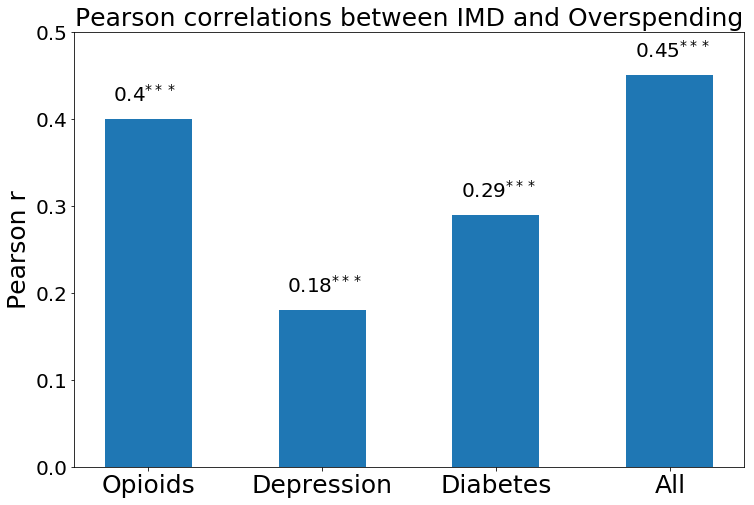

In [3]:
IMD = [0.4 , 0.18 , 0.29 , 0.45]
density = [0.0 , 0.0, 0.08 , 0.2]
labels = ['Opioids', 'Depression' , 'Diabetes', 'All']
x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
y = np.arange(0,0.6,0.1)
rects1 = ax.bar(x, IMD, width, label='IMD')
# rects2 = ax.bar(x + width/2, density, width, label='Population density')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Pearson r',fontsize=25)
ax.set_title('Pearson correlations between IMD and Overspending',fontsize=25)
ax.set_xticks(x)
ax.set_yticks(y)
plt.yticks(fontsize=20)
ax.annotate(r'$0.4^{***}$',xy=(-0.2, 0.42) , fontsize = 20)
ax.annotate(r'$0.18^{***}$',xy=(0.8, 0.20) , fontsize = 20)
ax.annotate(r'$0.29^{***}$',xy=(1.8, 0.31) , fontsize = 20)
ax.annotate(r'$0.45^{***}$',xy=(2.8, 0.47) , fontsize = 20)

ax.set_xticklabels(labels,fontsize = 25)
# ax.legend(fontsize = 15)

In [18]:
def func_Cost(potgroup):
    
    generics= potgroup.loc[potgroup['20'] == 'AA']
    nonGenerics =  potgroup.loc[potgroup['20'] != 'AA']

    minCost = np.min(generics['7'])
    minpotdf = generics.loc[generics['7'] == minCost]
    minQuant = np.min(minpotdf['8'])
    if minQuant == 0:
        normalizer = minCost
    else:
        normalizer = float(minCost)/float(minQuant)
    
    if np.isnan(normalizer):
        normalizer = 1.0
    potgroup['21'] = normalizer
    
    minCostBrand = np.min(nonGenerics['7'])
    minpotdfBrand = nonGenerics.loc[nonGenerics['7'] == minCostBrand]
    minQuantBrand = np.min(minpotdfBrand['8'])
    
    if minQuantBrand == 0:
        unitNonGenericCost = minCostBrand
    else:
        unitNonGenericCost = float(minCostBrand)/float(minQuantBrand)
    
    if np.isnan(unitNonGenericCost):
        unitNonGenericCost = 1.0
    potgroup['22'] = unitNonGenericCost
    if unitNonGenericCost > normalizer:
        potgroup['23'] = float(unitNonGenericCost - normalizer)*potgroup['8']    
    return potgroup

def func_Drugs(group):
    return group.groupby('15',as_index=False).apply(lambda df : func_Cost(df))
    

def computeSavingsNew(pdp):
    pdp['21'] = 0.0
    pdp['22'] = 0.0
    pdp['23'] = 0.0
    return pdp.groupby('16',as_index=False).apply(lambda df: func_Drugs(df ))

In [19]:
monthFiles = glob.glob('../BL_Work/openPrescribe/serialized/*.gz')

In [20]:
monthFiles.sort()

In [21]:
monthFiles

[u'../BL_Work/openPrescribe/serialized/201008.gz',
 u'../BL_Work/openPrescribe/serialized/201009.gz',
 u'../BL_Work/openPrescribe/serialized/201010.gz',
 u'../BL_Work/openPrescribe/serialized/201011.gz',
 u'../BL_Work/openPrescribe/serialized/201012.gz',
 u'../BL_Work/openPrescribe/serialized/201101.gz',
 u'../BL_Work/openPrescribe/serialized/201102.gz',
 u'../BL_Work/openPrescribe/serialized/201103.gz',
 u'../BL_Work/openPrescribe/serialized/201104.gz',
 u'../BL_Work/openPrescribe/serialized/201105.gz',
 u'../BL_Work/openPrescribe/serialized/201106.gz',
 u'../BL_Work/openPrescribe/serialized/201107.gz',
 u'../BL_Work/openPrescribe/serialized/201108.gz',
 u'../BL_Work/openPrescribe/serialized/201109.gz',
 u'../BL_Work/openPrescribe/serialized/201110.gz',
 u'../BL_Work/openPrescribe/serialized/201111.gz',
 u'../BL_Work/openPrescribe/serialized/201112.gz',
 u'../BL_Work/openPrescribe/serialized/201201.gz',
 u'../BL_Work/openPrescribe/serialized/201202.gz',
 u'../BL_Work/openPrescribe/ser

In [22]:
months = [k.split('/')[-1].split('.')[0] for k in monthFiles]

In [23]:
months

[u'201008',
 u'201009',
 u'201010',
 u'201011',
 u'201012',
 u'201101',
 u'201102',
 u'201103',
 u'201104',
 u'201105',
 u'201106',
 u'201107',
 u'201108',
 u'201109',
 u'201110',
 u'201111',
 u'201112',
 u'201201',
 u'201202',
 u'201203',
 u'201204',
 u'201205',
 u'201206',
 u'201207',
 u'201208',
 u'201209',
 u'201210',
 u'201211',
 u'201212',
 u'201301',
 u'201302',
 u'201303',
 u'201304',
 u'201305',
 u'201306',
 u'201307',
 u'201308',
 u'201309',
 u'201310',
 u'201311',
 u'201312',
 u'201401',
 u'201402',
 u'201403',
 u'201404',
 u'201405',
 u'201406',
 u'201407',
 u'201408',
 u'201409',
 u'201410',
 u'201411',
 u'201412',
 u'201501',
 u'201502',
 u'201503',
 u'201504',
 u'201505',
 u'201506',
 u'201507',
 u'201508',
 u'201509',
 u'201510',
 u'201511',
 u'201512',
 u'201601',
 u'201602',
 u'201603',
 u'201604',
 u'201605',
 u'201606',
 u'201607',
 u'201608',
 u'201609',
 u'201610',
 u'201611',
 u'201612',
 u'201701',
 u'201702',
 u'201703',
 u'201704',
 u'201705',
 u'201706',
 u'2

In [24]:
pdp = pd.read_csv(monthFiles[0],compression='gzip')
pdp.dropna()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
28,28,Q30,5D7,A86003,0103010T0AAAAAA,Ranitidine HCl_Tab 150mg,47.0,102.93,96.25,2432.0,...,0103010T0,rheumatoid,arthritis,Ranitidine Hydrochloride,150.0,0103010T0,1216.000000,30.000000,36480.000000,AA
29,29,Q30,5D7,A86003,0103010T0AAACAC,Ranitidine HCl_Tab 300mg,15.0,40.56,37.81,472.0,...,0103010T0,rheumatoid,arthritis,Ranitidine Hydrochloride,300.0,0103010T0,236.000000,60.000000,14160.000000,AA
30,30,Q30,5D7,A86003,0103010T0AAAEAE,Ranitidine HCl_Oral Soln 75mg/5ml S/F,2.0,39.16,36.10,600.0,...,0103010T0,rheumatoid,arthritis,Ranitidine Hydrochloride,75.0,0103010T0,300.000000,15.000000,4500.000000,AA
31,31,Q30,5D7,A86003,0103010T0AAAIAI,Ranitidine HCl_Tab Eff 150mg,1.0,17.70,16.32,60.0,...,0103010T0,rheumatoid,arthritis,Ranitidine Hydrochloride,150.0,0103010T0,30.000000,30.000000,900.000000,AA
65,65,Q30,5D7,A86003,0105010E0AAAAAA,Sulfasalazine_Tab 500mg,8.0,8.32,7.92,112.0,...,0105010E0,rheumatoid,arthritis,Sulfasalazine,500.0,0105010E0,18.666667,2.500000,46.666667,AA
66,66,Q30,5D7,A86003,0105010E0AAABAB,Sulfasalazine_Tab E/C 500mg,10.0,206.30,190.15,938.0,...,0105010E0,rheumatoid,arthritis,Sulfasalazine,500.0,0105010E0,156.333333,2.500000,390.833333,AA
67,67,Q30,5D7,A86003,0105010E0BBABAB,Salazopyrin-En_Tab 500mg,2.0,9.33,8.65,124.0,...,0105010E0,rheumatoid,arthritis,Sulfasalazine,500.0,0105010E0,20.666667,2.500000,51.666667,BB
500,500,Q30,5D7,A86003,0401020B0AAAAAA,Buspirone HCl_Tab 5mg,9.0,294.10,270.92,582.0,...,0401020B0,depression,anxiety,Buspirone Hydrochloride,5.0,0401020B0,116.400000,1.000000,116.400000,AA
501,501,Q30,5D7,A86003,0401020B0AAABAB,Buspirone HCl_Tab 10mg,13.0,429.57,395.72,684.0,...,0401020B0,depression,anxiety,Buspirone Hydrochloride,10.0,0401020B0,136.800000,2.000000,273.600000,AA
502,502,Q30,5D7,A86003,0401020E0AAAEAE,Chlordiazepox HCl_Cap 10mg,2.0,9.54,8.84,75.0,...,0401020E0,depression,anxiety,Chlordiazepoxide Hydrochloride,10.0,0401020E0,75.000000,2.000000,150.000000,AA


In [25]:
set(pdp['12'])

{nan,
 "Meniere's disease",
 'bipolar',
 "crohn's disease",
 'dementia',
 'depression',
 'diabetes',
 'gastroparesis',
 'hypothyroidism',
 'interstitial cystitis',
 'irritable bowel syndrome',
 'parkinson',
 'psoriasis',
 'rheumatoid',
 'sleep apnea'}

In [26]:
import logging
logger = logging.getLogger()
fhandler = logging.FileHandler(filename='timeLineLog.log', mode='a')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)

In [27]:
drugbank_dict = json.load(open('Drugbank_drugs_data.json','rb'))

In [28]:
chem = pd.read_csv('../BL_Work/CHEM_MASTER_MAP.csv')

In [29]:
opiod_matched , drugs_opiates = getDrugCategory(['opioid','opiate'],chem,drugbank_dict)

{'code': '0410030F0', 'name': 'Levacetylmethadol Hydrochloride                             '}
{'code': '0410030F0', 'name': 'Levacetylmethadol Hydrochloride                             '}
{'code': '0407020K0', 'name': 'Diamorphine Hydrochloride (Systemic)                        '}
{'code': '0407020K0', 'name': 'Diamorphine Hydrochloride (Systemic)                        '}
{'code': '0407020K0', 'name': 'Diamorphine Hydrochloride (Systemic)                        '}
{'code': '0410030A0', 'name': 'Buprenorphine Hydrochloride                                 '}
{'code': '0410030A0', 'name': 'Buprenorphine Hydrochloride                                 '}
{'code': '0410030A0', 'name': 'Buprenorphine Hydrochloride                                 '}
{'code': '0410030A0', 'name': 'Buprenorphine Hydrochloride                                 '}
{'code': '0410030A0', 'name': 'Buprenorphine Hydrochloride                                 '}
{'code': '0410030A0', 'name': 'Buprenorphine Hydrochloride  

In [30]:
len(opiod_matched)

37

In [31]:
opiod_Drugbank = chem[chem['UNII_drugbank'].isin(opiod_matched)]

In [32]:
opiod_Drugbank

,Unnamed: 0,BNF_code,NAME,UNII_drugbank
59,59,010200010,Papaverine Hydrochloride,DAA13NKG2Q
88,88,0104020D0,Codeine Phosphate Compound Mixtures,UX6OWY2V7J
90,90,0104020L0,Loperamide Hydrochloride,6X9OC3H4II
91,91,0104020N0,Opium & Morphine,76I7G6D29C
92,92,0104020P0,Loperamide Hydrochloride & Simeticone,6X9OC3H4II
154,154,0106060A0,Methylnaltrexone Bromide,0RK7M7IABE
155,155,0106060B0,Naloxegol,44T7335BKE
691,691,0309010C0,Codeine Phosphate,UX6OWY2V7J
692,692,0309010L0,Dextromethorphan Hydrobromide,7355X3ROTS
693,693,0309010N0,Diamorphine Hydrochloride,70D95007SX


In [33]:
pdp.keys()

Index([u'Unnamed: 0', u'0', u'1', u'2', u'3', u'4', u'5', u'6', u'7', u'8',
       u'9', u'10', u'11', u'12', u'13', u'14', u'15', u'16', u'17', u'18',
       u'19', u'20'],
      dtype='object')

In [19]:
print countTotalDrugDosage(pdp,opiod_Drugbank['BNF_code'] )/56938269.0

17.821387296961905


In [20]:
print countPrescriptionsByCategoryList(pdp ,opiod_Drugbank['BNF_code'] )/float(56938269.0)

0.00520830726343


In [21]:
print float(countDrugsCostByCategoryList(pdp ,opiod_Drugbank['BNF_code'] ))/56938269.0

0.351412073135


In [22]:
print float(countDrugsCostByGenerics(pdp ,opiod_Drugbank['BNF_code'] ))/56938269.0

0.264924815681


In [23]:
print float( countDrugsByCategoryList(pdp,opiod_Drugbank['BNF_code'] ))/56938269.0

0.0323944867379


In [24]:
len(monthFiles)

107

In [25]:
fentanyl = opiod_Drugbank[opiod_Drugbank['NAME'].str.contains('Fentanyl')]

In [26]:
fentanyl

,Unnamed: 0,BNF_code,NAME,UNII_drugbank
981,981,0407020A0,Fentanyl,UF599785JZ
3246,3246,1501043F0,Fentanyl Citrate,UF599785JZ


In [27]:
# with open('Opioid_timeSeries.csv', mode='a') as csv_file:
#     fieldnames = ['Period', 'Dosage_per_1000', 'Prescriptions_per_1000','Total_cost_per_1000','Generic_cost_per_1000']
#     writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
#     scale = (1000.0/56938269.0)
#     writer.writeheader()
#     for f in tqdm(monthFiles[65:]):
#         logging.info("working with File: "+str(f))
        
#         year = f.split('/')[-1].split('.')[0]
#         pdp = pd.read_csv(f,compression='gzip')
#         pdp.dropna()
#         Dosage = float( countTotalDrugDosage(pdp,opiod_Drugbank['BNF_code'] ))*scale
#         Presc =  float( countPrescriptionsByCategoryList(pdp ,opiod_Drugbank['BNF_code'] ))*scale
#         Cost = float(countDrugsCostByCategoryList(pdp ,opiod_Drugbank['BNF_code'] ))*scale
#         Generics = float(countDrugsCostByGenerics(pdp ,opiod_Drugbank['BNF_code'] ))*scale
                       
#         writer.writerow({'Period': year , 'Dosage_per_1000': Dosage , 'Prescriptions_per_1000': Presc , 'Total_cost_per_1000' : Cost , 'Generic_cost_per_1000' : Generics})

In [28]:
# with open('Opioid_Drugs_per_1000.csv', mode='a') as csv_file:
#     fieldnames = ['Period', 'Drugs_count']
#     writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
#     scale = (1000.0/56938269.0)
#     writer.writeheader()
#     for f in tqdm(monthFiles):
#         logging.info("working with File: "+str(f))
        
#         year = f.split('/')[-1].split('.')[0]
#         pdp = pd.read_csv(f,compression='gzip')
#         pdp.dropna()
#         Dosage = float( countDrugsByCategoryList(pdp,opiod_Drugbank['BNF_code'] ))*scale
                       
#         writer.writerow({'Period': year , 'Drugs_count': Dosage })

In [29]:
# with open('Fentanyl_timeSeries.csv', mode='w') as csv_file:
#     fieldnames = ['Period', 'Dosage_per_1000', 'Prescriptions_per_1000','Drugs_count','Total_cost_per_1000','Generic_cost_per_1000']
#     writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
#     scale = (1000.0/56938269.0)
#     writer.writeheader()
#     for f in tqdm(monthFiles):
#         logging.info("Fentanyl working with File: "+str(f))
        
#         year = f.split('/')[-1].split('.')[0]
#         pdp = pd.read_csv(f,compression='gzip')
#         pdp.dropna()
#         Dosage = float( countTotalDrugDosage(pdp,fentanyl['BNF_code'] ))*scale
#         Presc =  float( countPrescriptionsByCategoryList(pdp ,fentanyl['BNF_code'] ))*scale
#         Count = float( countDrugsByCategoryList(pdp,fentanyl['BNF_code'] ))*scale
#         Cost = float(countDrugsCostByCategoryList(pdp ,fentanyl['BNF_code'] ))*scale
#         Generics = float(countDrugsCostByGenerics(pdp ,fentanyl['BNF_code'] ))*scale
        
                       
#         writer.writerow({'Period': year , 'Dosage_per_1000': Dosage , 'Prescriptions_per_1000': Presc ,'Drugs_count':Count ,'Total_cost_per_1000' : Cost , 'Generic_cost_per_1000' : Generics})

In [30]:
%store -r opiod_BNF

In [31]:
# opiod_BNF

In [32]:
monthList = ['201601', '201602', '201603' , '201604','201605','201606','201607','201608','201609','201610','201611','201612']

finalMonths = [k for k in months if k not in monthList]
print finalMonths

[u'201008', u'201009', u'201010', u'201011', u'201012', u'201101', u'201102', u'201103', u'201104', u'201105', u'201106', u'201107', u'201108', u'201109', u'201110', u'201111', u'201112', u'201201', u'201202', u'201203', u'201204', u'201205', u'201206', u'201207', u'201208', u'201209', u'201210', u'201211', u'201212', u'201301', u'201302', u'201303', u'201304', u'201305', u'201306', u'201307', u'201308', u'201309', u'201310', u'201311', u'201312', u'201401', u'201402', u'201403', u'201404', u'201405', u'201406', u'201407', u'201408', u'201409', u'201410', u'201411', u'201412', u'201501', u'201502', u'201503', u'201504', u'201505', u'201506', u'201507', u'201508', u'201509', u'201510', u'201511', u'201512', u'201701', u'201702', u'201703', u'201704', u'201705', u'201706', u'201707', u'201708', u'201709', u'201710', u'201711', u'201712', u'201801', u'201802', u'201803', u'201804', u'201805', u'201806', u'201807', u'201808', u'201809', u'201810', u'201811', u'201812', u'201901', u'201902'

In [33]:
# Dir = '../BL_Work/openPrescribe/savings/'
# source = '../BL_Work/openPrescribe/serialized/'
# for f in tqdm(finalMonths):
#     source_file = source + f + '.gz'
#     pdp = pd.read_csv(source_file,compression='gzip')
#     pdp.dropna()
#     savings_df = computeSavingsNew(pdp)
#     filename = Dir + f +'.h5'
#     savings_df.to_hdf(filename,key=f, mode='w')

In [34]:
monthList = ['201601', '201602', '201603' , '201604','201605','201606','201607','201608','201609','201610','201611','201612']

In [35]:
months

[u'201008',
 u'201009',
 u'201010',
 u'201011',
 u'201012',
 u'201101',
 u'201102',
 u'201103',
 u'201104',
 u'201105',
 u'201106',
 u'201107',
 u'201108',
 u'201109',
 u'201110',
 u'201111',
 u'201112',
 u'201201',
 u'201202',
 u'201203',
 u'201204',
 u'201205',
 u'201206',
 u'201207',
 u'201208',
 u'201209',
 u'201210',
 u'201211',
 u'201212',
 u'201301',
 u'201302',
 u'201303',
 u'201304',
 u'201305',
 u'201306',
 u'201307',
 u'201308',
 u'201309',
 u'201310',
 u'201311',
 u'201312',
 u'201401',
 u'201402',
 u'201403',
 u'201404',
 u'201405',
 u'201406',
 u'201407',
 u'201408',
 u'201409',
 u'201410',
 u'201411',
 u'201412',
 u'201501',
 u'201502',
 u'201503',
 u'201504',
 u'201505',
 u'201506',
 u'201507',
 u'201508',
 u'201509',
 u'201510',
 u'201511',
 u'201512',
 u'201601',
 u'201602',
 u'201603',
 u'201604',
 u'201605',
 u'201606',
 u'201607',
 u'201608',
 u'201609',
 u'201610',
 u'201611',
 u'201612',
 u'201701',
 u'201702',
 u'201703',
 u'201704',
 u'201705',
 u'201706',
 u'2

In [36]:
# monthList = ['201601', '201602', '201603' , '201604','201605','201606','201607','201608','201609','201610','201611','201612']
# monthList = months
# Dir = '../BL_Work/openPrescribe/savings/'
# savingsDict = {}
# diseases = ['depression','rheumatoid','dementia','diabetes']
# with open('savings_timeSeries.csv', mode='a') as csv_file:
#     fieldnames = ['period', 'depression', 'rheumatoid','dementia','diabetes']
#     writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
#     writer.writeheader()
#     for f in tqdm(monthList):
#         if f not in savingsDict:
#             savingsDict[f]={}
#         source_file = Dir + f + '.h5'
#         pdp = pd.read_hdf(source_file)
#         savingsDict[f]['total'] = np.sum(pdp['7'])
#         for d in diseases:
#             key = 'total_' + d

#             disease_df = pdp[pdp['12'] == d]
#             savingsDict[f][key] = np.sum(disease_df['7'])
#             nonGeneric = disease_df.loc[disease_df['20'] != 'AA']
#             diseaseSavings = np.sum(nonGeneric['23'])
#             savingsDict[f][d] = diseaseSavings


In [34]:
%store -r savingsDict

In [35]:
savingsDict2016 = savingsDict.copy()

In [36]:
savingsDict

{u'201008': {u'dementia': 65227.357279220785,
  u'depression': 579787.0466190476,
  u'diabetes': 30491.73450000001,
  u'rheumatoid': 50531.45196134453,
  u'total': 571528470.1800008,
  u'total_dementia': 6641800.75,
  u'total_depression': 9233591.450000001,
  u'total_diabetes': 31788149.64,
  u'total_rheumatoid': 16208929.009999998},
 u'201009': {u'dementia': 63468.64654761905,
  u'depression': 676086.6773571428,
  u'diabetes': 36313.86754761918,
  u'rheumatoid': 74348.4880107143,
  u'total': 622624814.5300007,
  u'total_dementia': 7188143.41,
  u'total_depression': 10051136.67,
  u'total_diabetes': 34504156.64000001,
  u'total_rheumatoid': 17626334.52},
 u'201010': {u'dementia': 67019.56757142856,
  u'depression': 613716.1854761904,
  u'diabetes': 268476.5470587304,
  u'rheumatoid': 278749.678252381,
  u'total': 592269083.0500002,
  u'total_dementia': 6663086.859999999,
  u'total_depression': 8437387.670000002,
  u'total_diabetes': 32417296.83,
  u'total_rheumatoid': 15636112.94},
 u'

In [37]:
# %store -r opioid_overspend

In [38]:
# opioid_overspend

In [39]:
# overSpend = {'year':[],'depression_total':[],'depression_over':[],'diabetes_total':[],'diabetes_over':[],'opioid_total':[],'opioid_over':[]}
# for k in savingsDict:
#     overSpend['year'].append(k)
#     overSpend['depression_total'].append(savingsDict[k]['total_depression'])
#     overSpend['depression_over'].append(savingsDict[k]['depression'])
#     overSpend['diabetes_total'].append(savingsDict[k]['total_diabetes'])
#     overSpend['diabetes_over'].append(savingsDict[k]['diabetes'])
#     overSpend['opioid_total'].append(opioid_overspend['costs'][k])
#     overSpend['opioid_over'].append(opioid_overspend['savings'][k])

In [40]:
# savings_df = pd.DataFrame.from_dict(overSpend,orient='columns')

In [41]:
# savings_df.to_csv('Savings_monthly_all.csv')


In [42]:
savings_df = pd.read_csv('Savings_monthly_all.csv')

In [43]:
# scale = (1000.0/56938269.0)
# for k in savingsDict2016:
#     for d in savingsDict2016[k]:
#         savingsDict2016[k][d] = savingsDict2016[k][d]*scale
        

In [44]:
months = sorted(savings_df['year'].tolist())
labels= [months[3*i] for i in range(0,len(months)/3)]

In [45]:
monthLabels = ['Aug 2010', '' , '' ,'', '', 'Jan 2011', '' , '' , '' , '' , '' , 'July 2011','','','','','', 'Jan 2012','','','','','' ,'July 2012','','','','','', 'Jan 2013','','','','','' ,'July 2013','','','','','', 'Jan 2014','','','','','' ,'July 2014','','','','','', 'Jan 2015','','','','','' ,'July 2015','','','','','', 'Jan 2016' ,'','','','', '', 'July 2016','','','','', '', 'Jan 2017' ,'','','','', '','July 2017','','','','', '', 'Jan 2018' ,'','','','', '', 'July 2018', '','','','', '', 'Jan 2019' ,'','','','', 'June 2019']

Text(0,0.5,u'Overspending(\xa3 Million)')

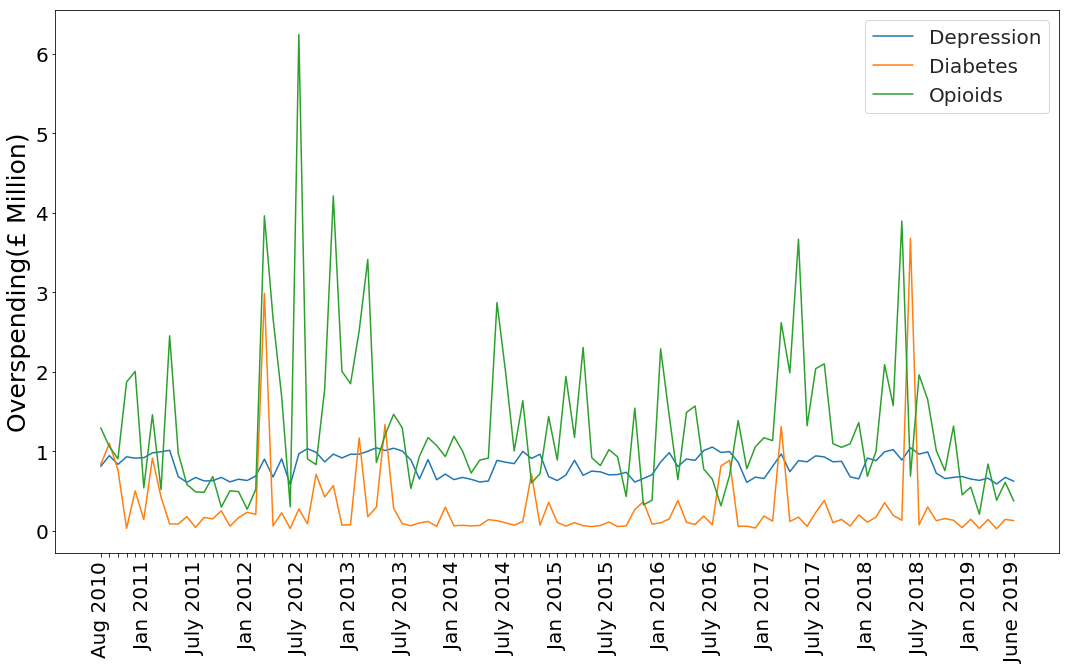

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
sns.set_style("white")
sns.lineplot(y=savings_df['depression_over']/1000000,x=np.arange(0,len(savings_df),1))
sns.lineplot(y=savings_df['diabetes_over']/1000000,x=np.arange(0,len(savings_df),1))
sns.lineplot(y=savings_df['opioid_over']/1000000,x=np.arange(0,len(savings_df),1))
ax = plt.gca()
plt.xticks(np.arange(0,len(savings_df),1),monthLabels,rotation=90,fontsize= 20)
plt.yticks(fontsize= 20)
plt.legend(['Depression', 'Diabetes', 'Opioids'], fontsize = 20)
# plt.xlabel("Year and month  (YYYYMM) ",fontsize=25)
plt.ylabel("Overspending(£ Million)",fontsize=25)

In [47]:
# %store savingsDict2016

NameError: name 'rc' is not defined

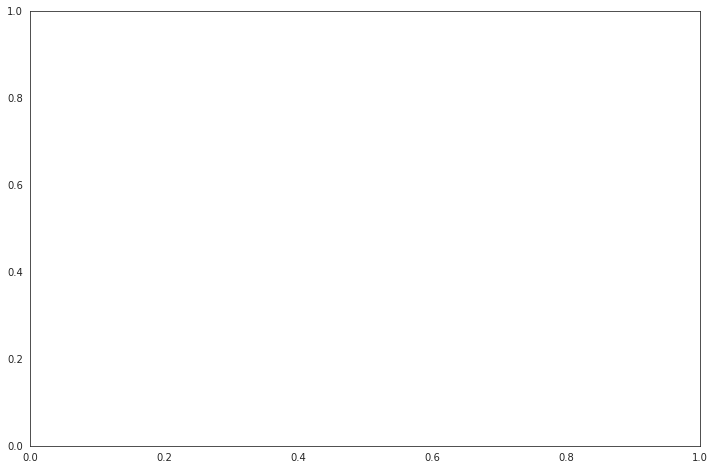

In [48]:
# libraries
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.set_style("white")
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
disease = 'rheumatoid'
saving = [savingsDict2016[k][disease] for k in savingsDict2016]
total = [savingsDict2016[k]['total_'+disease] for k in savingsDict2016]
 
# Heights of bars1 + bars2
bars = np.add(saving, total).tolist()
 
# The position of the bars on the x-axis
r = np.arange(0,len(total),1)
 
# Names of group and bar width
names = ['Jan' , 'Feb' , 'Mar', 'Apr' , 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct' , 'Nov', 'Dec']
width = 0.35  
 
p1 = plt.bar(r, total, width)
p2 = plt.bar(r, saving, width,             bottom=total)

plt.ylabel('Expense in £' , fontsize = 18)
plt.title('Expense and savings for year 2016 across England: '+ disease,fontsize = 20 )
plt.xticks(r, names,fontsize = 13)
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Total Expenditure per 1000', 'Savings per 1000'),fontsize = 14)

plt.show()


In [67]:
# pdp = pd.read_csv(source_file,compression='gzip')

In [68]:
# pdp.dropna()

In [69]:
# savings_df = computeSavingsNew(pdp,opiod_BNF['BNF_code'])

In [70]:
# savings_df

In [63]:
# savings_df.to_hdf('../BL_Work/openPrescribe/savings/201601.h5', key='', mode='w')

In [64]:
# test = pd.read_hdf('../BL_Work/openPrescribe/savings/201601.h5')

In [65]:
# test.head()